In [37]:
import sys, os
sys.path.append(os.path.join(sys.path[0].split('Documents')[0],'Documents/BecaNLP/Utils'))

import NLPUtils as nlp
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cargamos el dataset

,Pregunta,Intencion
0,como puedo trabajar en santander rio,102
1,pagar tarjeta visa querer reintegro,350
2,pagar tarjeta naranja sistema,132
3,no se debitó la primera cuota del plan de bien...,129
4,abonar tarjeta credito,342


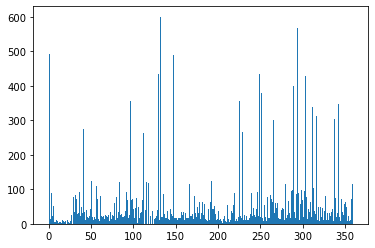

In [5]:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))
categories = set(df['Intencion'].values)
name2idx = {name:idx for idx, name in enumerate(categories)}
idx2name = {idx:name for idx, name in enumerate(categories)}
_ = plt.hist(df['Intencion'].values,bins=max(df['Intencion']))
df.head()

# Clasificación por Naive Bayes

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from utils import *

ngram_range = (1,2)
max_features_list = np.linspace(5000,80000,10)
max_features_list = [None]
#alphas = np.logspace(.00001,.01,10) - 1
alpha = 0.0002


vec = CountVectorizer(ngram_range=ngram_range,max_features=None,token_pattern=r'\b\w+\b')
model = MultinomialNB(alpha=alpha)

scores = k_fold_validation(model,df,vec,reweight='tfidf',k_folds=10,random_state=0,metrics=['accuracy','balanced_accuracy'])
#print('alpha = {:.5g}'.format(alpha))
print(scores)
    

/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred con

alpha = 0.0002
{'accuracy': 0.7603460074070225, 'balanced_accuracy': 0.6535998006871011}


/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred con

alpha = 0.00025
{'accuracy': 0.7604952363988116, 'balanced_accuracy': 0.6528597964569945}


/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


# Evaluamos en Test

In [78]:
df_train = df
df_test = pd.read_csv('../test_santander.csv')

ngram_range = (1,2)
max_features = None
alpha = 0.0002
vec = CountVectorizer(ngram_range=ngram_range, max_features=max_features,token_pattern=r'\b\w+\b')

model = MultinomialNB(alpha=alpha)

X_train = vec.fit_transform(df_train['Pregunta'])
X_test = vec.transform(df_test['Pregunta'])

model.fit(X_train,df_train['Intencion'].values)
y_pred = model.predict(X_test)
df_test['Pregunta'] = y_pred
df_test.to_csv('./results.csv',index=False,header=False)